In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
img_array = cv2.imread("train/angry/Training_10118481.jpg")


In [3]:
img_array.shape

(48, 48, 3)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

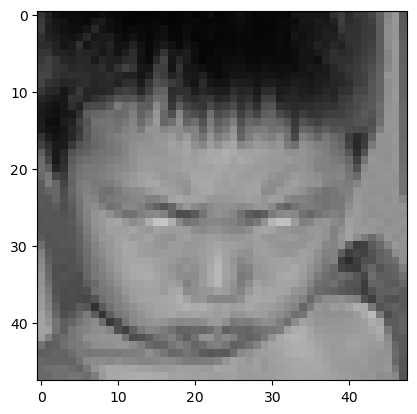

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "train/"

In [7]:
classes = ["angry","disgust","fear", "happy","neutral","sad","surprise"]

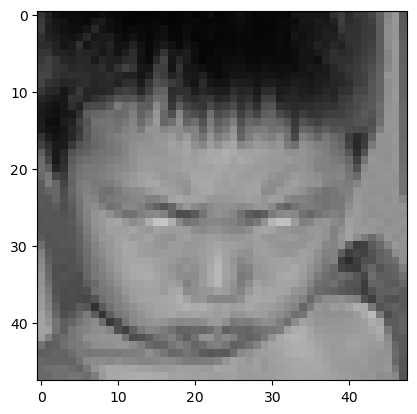

In [8]:
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

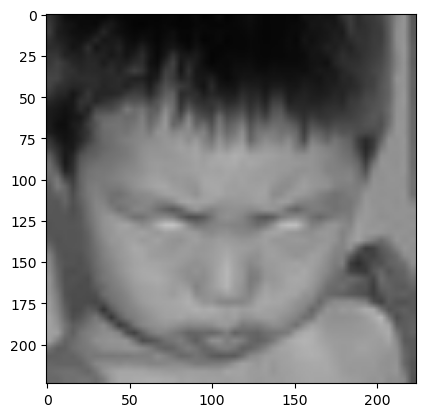

In [9]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        

In [12]:
create_training_data()

In [13]:
print(len(training_data))

15649


In [14]:
import random
random.shuffle(training_data)


In [15]:
x = [] #Data/Feature
y = [] #Label


for features,label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x, dtype='uint8').reshape(-1, img_size, img_size,3) #Converting it into 4 dimenshions
y = np.array(y, dtype='uint8')

In [ ]:
x.shape

(15649, 224, 224, 3)

In [ ]:
for i in range(0,15649):
    x[i] = x[i]/255

# Deep Learning Model For Training - Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()  ## pre-trained model

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output = layers.Dense(128)(base_output) # Adding the new layer after the output of golbal pooling layer
final_ouput = layers.Activation('relu')(final_output)  #Activation Function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput) #Total classes are 7, Classification layer

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# new_model.fit(x,y, epochs=100) 

In [ ]:
# new_model.save('Finall_model_95p07.h5')
# /content/drive/MyDrive/Colab Notebooks

In [ ]:
new_model = tf.keras.models.load_model('Finall_model_95p07.h5')

In [ ]:
frame = cv2.imread("happy-boy.jpg")

In [ ]:
frame.shape

(232, 300, 3)

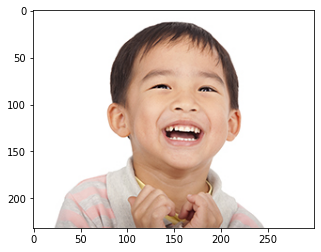

In [ ]:

plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(232, 300)

In [ ]:
# Detect faces
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y), (x+w, y+h),(0,255,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        
        print("Face not Detect")    
    else:
        
        for (ex,ey,ew,eh) in facess:
            
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]



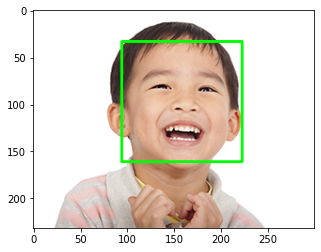

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

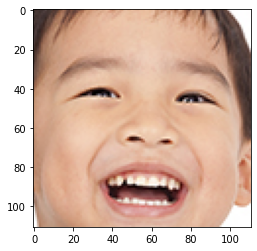

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_img = cv2.resize(face_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [ ]:
predictions = new_model.predict(final_img)

1/1 [==============================] - 9s 9s/step


In [ ]:
predictions[0]

array([1.2698959e-01, 2.5498119e-04, 1.8518168e-01, 3.0427441e-01,
       2.6184317e-01, 1.0165567e-01, 1.9800477e-02], dtype=float32)

In [ ]:
np.argmax(predictions)

3